In [1]:
import numpy as np
import pandas as pd

from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from load_datasets import load_diabetes, load_breast_cancer, load_svmguide1, load_australian, load_mushrooms, load_german
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic_epochs, diagnostic_time, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_1944\2802561659.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Diabetes

In [2]:
data_diab = load_diabetes()

X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}


In [3]:
CDiab = 1
MDiab = 8
kDiab = 200
print(f"Iterations: {data_diab[1].size / MDiab}")

Iterations: 76.75


## Benchmark

In [4]:
benchDiab = run_bench(data_diab, CDiab)

benchDiab_data = optim_bench(benchDiab)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", CDiab, data_diab, kDiab, MDiab, (0.5, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_diab = run_solvers("SGDM", CDiab, data_diab, kDiab, MDiab, (0.5, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", CDiab, data_diab, kDiab, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
modelsDiab_data = optim_data(sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [12]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.193861
7,SGD-Decreasing,1,8.0,0.100,0.0,0.662128,0.000142,0.203911,200,0.653094,0.642857,0.193965
13,SGD-Armijo,1,8.0,0.100,0.0,0.662128,0.000178,1.260148,200,0.653094,0.642857,0.193880
5,SGD-Fixed,1,8.0,0.001,0.0,0.662128,0.000204,0.209613,200,0.653094,0.642857,0.193976
14,SGD-Armijo,1,8.0,0.010,0.0,0.662128,0.000461,1.252041,200,0.653094,0.642857,0.193871
18,MSL-SGDM-R,1,8.0,1.000,0.9,0.662129,0.001300,1.287191,200,0.653094,0.642857,0.193450
12,SGD-Armijo,1,8.0,1.000,0.0,0.662129,0.001379,1.279055,200,0.653094,0.642857,0.193861
11,SGDM,1,8.0,0.010,0.9,0.662129,0.001785,0.213354,200,0.653094,0.642857,0.193073


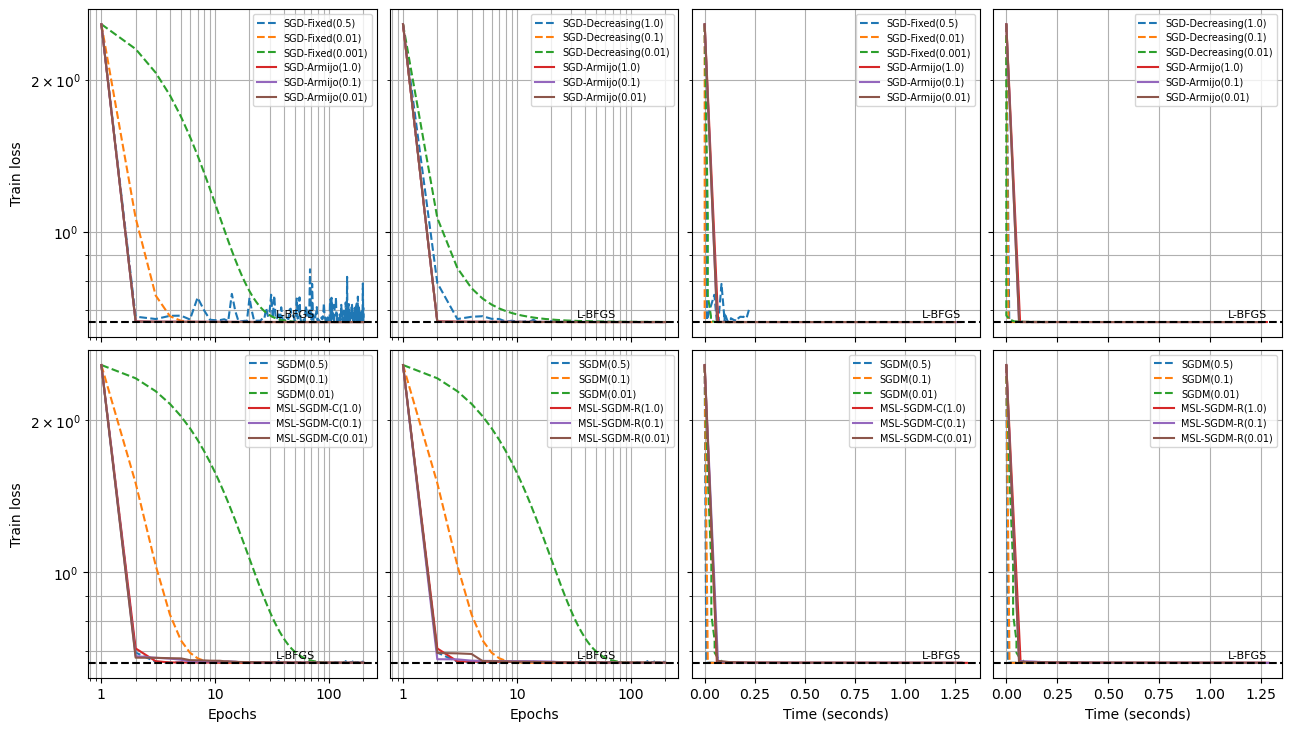

In [13]:
diagnostic(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-diagnostic.pdf")

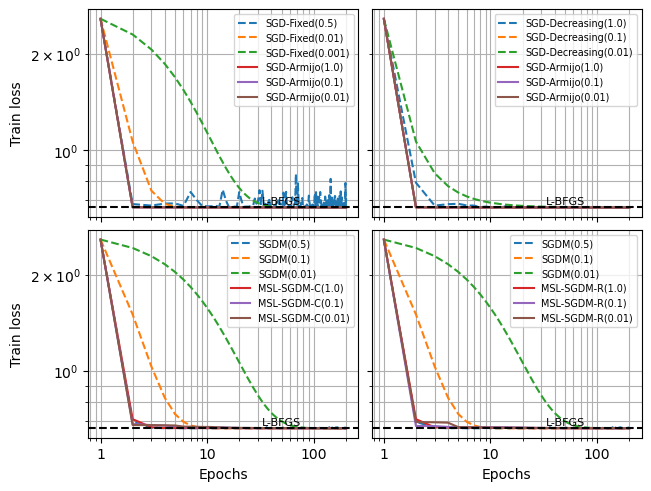

In [16]:
diagnostic_epochs(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-epochs.pdf")

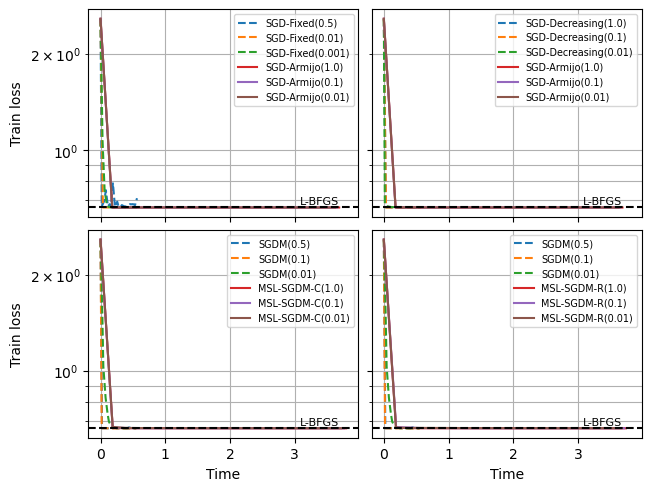

In [17]:
diagnostic_time(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-time.pdf")

## Fine-tuning

In [5]:
sgdfixed_diab1 = LogisticRegression("SGD-Fixed", CDiab).fit(data_diab, kDiab, MDiab, 0.005, stop=1)

In [6]:
sgddecre_diab1 = LogisticRegression("SGD-Decreasing", CDiab).fit(data_diab, kDiab, MDiab, 1, stop=1)

In [7]:
sgdm_diab1 = LogisticRegression("SGDM", CDiab).fit(data_diab, kDiab, MDiab, 0.05, 0.9, stop=1)

In [8]:
sgdarmijo_diab1 = LogisticRegression("SGD-Armijo", CDiab).fit(data_diab, kDiab, MDiab, 0.5, stop=1)

In [32]:
mslc_diab1 = LogisticRegression("MSL-SGDM-C", CDiab).fit(data_diab, kDiab, MDiab, 0.5, 0.9, stop=1)

In [28]:
mslr_diab1 = LogisticRegression("MSL-SGDM-R", CDiab).fit(data_diab, kDiab, MDiab, 0.8, 0.9, stop=1)

In [33]:
fine_diab_data = optim_data([sgdfixed_diab1, sgddecre_diab1, sgdm_diab1, sgdarmijo_diab1, mslc_diab1, mslr_diab1])

test_diab = models_summary(fine_diab_data, benchDiab_data).sort_values(by="Loss")
test_diab

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.193861
3,SGD-Fixed,1,8.0,0.005,0.0,0.662128,0.000873,0.000000e+00,25,0.653094,0.642857,0.193979
4,SGD-Decreasing,1,8.0,1.000,0.0,0.662128,0.000953,0.000000e+00,155,0.653094,0.642857,0.193410
6,SGD-Armijo,1,8.0,0.500,0.0,0.662128,0.000960,1.458558e-303,173,0.653094,0.642857,0.194015
5,SGDM,1,8.0,0.050,0.9,0.662129,0.000927,0.000000e+00,82,0.653094,0.642857,0.193783
8,MSL-SGDM-R,1,8.0,0.800,0.9,0.662129,0.001085,3.663621e+00,200,0.653094,0.642857,0.193623
7,MSL-SGDM-C,1,8.0,0.500,0.9,0.662142,0.005357,3.706425e+00,200,0.653094,0.642857,0.191948


In [34]:
print(test_diab[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.662128 & 0.642857 \\
CG & NaN & 6 & NaN & 0.662128 & 0.642857 \\
L-BFGS & NaN & 6 & NaN & 0.662128 & 0.642857 \\
SGD-Fixed & 0.005000 & 25 & 0.000000 & 0.662128 & 0.642857 \\
SGD-Decreasing & 1.000000 & 155 & 0.000000 & 0.662128 & 0.642857 \\
SGD-Armijo & 0.500000 & 173 & 0.000000 & 0.662128 & 0.642857 \\
SGDM & 0.050000 & 82 & 0.000000 & 0.662129 & 0.642857 \\
MSL-SGDM-R & 0.800000 & 200 & 3.663621 & 0.662129 & 0.642857 \\
MSL-SGDM-C & 0.500000 & 200 & 3.706425 & 0.662142 & 0.642857 \\
\bottomrule
\end{tabular}



# Breast cancer

In [2]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}


In [3]:
CBreast = 1
MBreast = 8
kBreast = 200
print(f"Iterations: {data_breast[1].size / MBreast}")

Iterations: 68.25


## Benchmark

In [4]:
benchBreast = run_bench(data_breast, CBreast)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", CBreast, data_breast, kBreast, MBreast, (0.5, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_breast = run_solvers("SGDM", CBreast, data_breast, kBreast, MBreast, (0.5, 0.01, 0.001), (0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [11]:
modelsBreast_data = optim_data(sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [12]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447463
7,SGD-Decreasing,1,8.0,0.100,0.0,0.492561,1.923749e-04,0.191942,200,0.902930,0.817518,0.447564
5,SGD-Fixed,1,8.0,0.001,0.0,0.492561,6.570132e-04,0.190322,200,0.902930,0.817518,0.447615
14,SGD-Armijo,1,8.0,0.010,0.0,0.492561,1.253336e-03,1.104428,200,0.902930,0.817518,0.447510
12,SGD-Armijo,1,8.0,1.000,0.0,0.492562,1.504207e-03,1.109539,200,0.902930,0.817518,0.447707
10,SGDM,1,8.0,0.010,0.9,0.492562,1.906914e-03,0.197080,200,0.902930,0.817518,0.447558
13,SGD-Armijo,1,8.0,0.100,0.0,0.492563,2.069448e-03,1.130267,200,0.902930,0.817518,0.447529
18,MSL-SGDM-R,1,8.0,1.000,0.9,0.492565,3.153037e-03,1.141680,200,0.902930,0.817518,0.447275


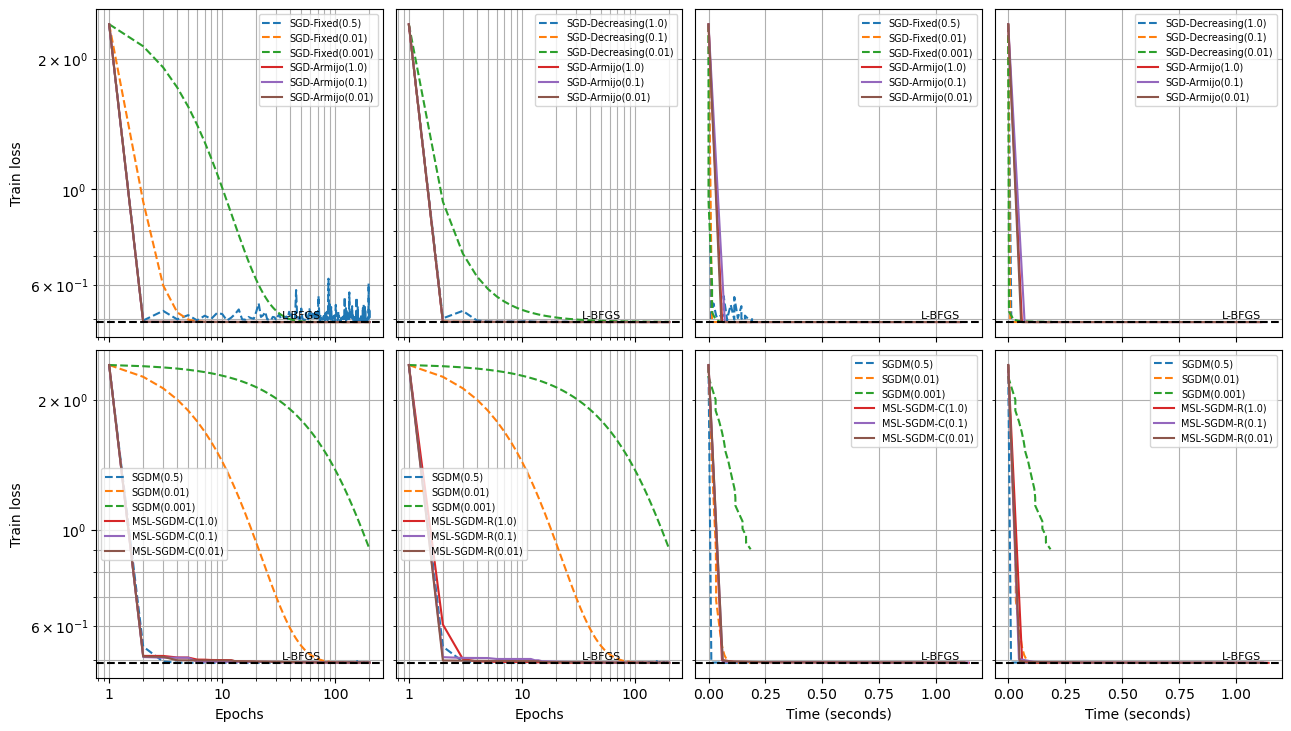

In [13]:
diagnostic(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-diagnostic.pdf")

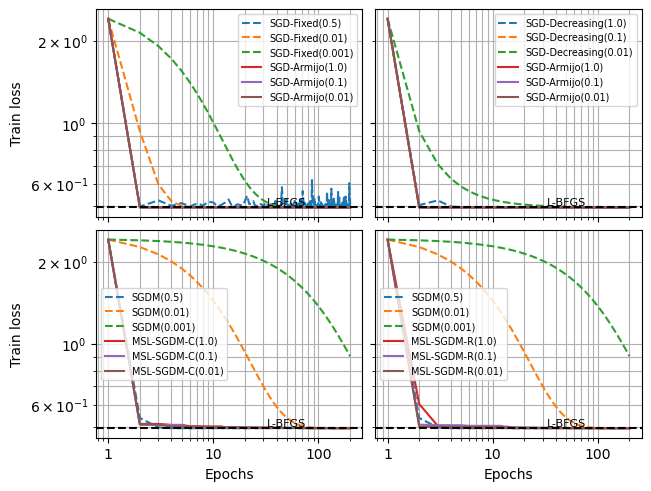

In [39]:
diagnostic_epochs(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-epochs.pdf")

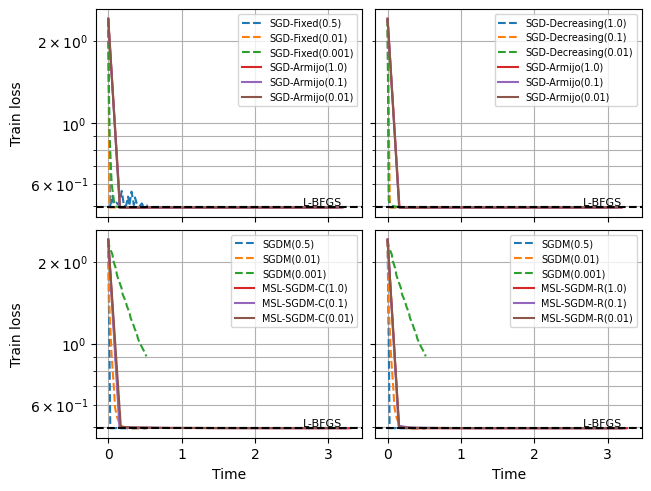

In [40]:
diagnostic_time(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-time.pdf")

## Fine-tuning

In [44]:
sgdfixed_breast1 = LogisticRegression("SGD-Fixed", CBreast).fit(data_breast, kBreast, MBreast, 0.005, stop=1)

In [21]:
sgddecre_breast1 = LogisticRegression("SGD-Decreasing", CBreast).fit(data_breast, kBreast, MBreast, 1, stop=1)

In [30]:
sgdm_breast1 = LogisticRegression("SGDM", CBreast).fit(data_breast, kBreast, MBreast, 0.05, 0.9, stop=1)

In [32]:
sgdarmijo_breast1 = LogisticRegression("SGD-Armijo", CBreast).fit(data_breast, kBreast, MBreast, 1, stop=1)

In [51]:
mslc_breast1 = LogisticRegression("MSL-SGDM-C", CBreast).fit(data_breast, kBreast, MBreast, 0.5, 0.9, stop=1)

In [63]:
mslr_breast1 = LogisticRegression("MSL-SGDM-R", CBreast).fit(data_breast, kBreast, MBreast, 0.5, 0.9, stop=1)

In [64]:
fine_breast_data = optim_data([sgdfixed_breast1, sgddecre_breast1, sgdm_breast1, sgdarmijo_breast1, mslc_breast1, mslr_breast1])

test_breast = models_summary(fine_breast_data, benchBreast_data).sort_values(by="Loss")
test_breast

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447463
5,SGDM,1,8.0,0.050,0.9,0.492561,1.108198e-03,3.162020e-322,76,0.902930,0.817518,0.447129
3,SGD-Fixed,1,8.0,0.005,0.0,0.492561,1.370091e-03,4.925623e-01,24,0.902930,0.817518,0.447294
4,SGD-Decreasing,1,8.0,1.000,0.0,0.492561,1.429430e-03,1.222052e-311,129,0.902930,0.817518,0.448173
6,SGD-Armijo,1,8.0,1.000,0.0,0.492562,1.478000e-03,0.000000e+00,81,0.902930,0.817518,0.447012
8,MSL-SGDM-R,1,8.0,0.500,0.9,0.492572,4.901774e-03,3.229806e+00,200,0.902930,0.817518,0.447008
7,MSL-SGDM-C,1,8.0,0.500,0.9,0.492730,1.915761e-02,3.264365e+00,200,0.901099,0.817518,0.442534


In [65]:
print(test_breast[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.492561 & 0.817518 \\
CG & NaN & 8 & NaN & 0.492561 & 0.817518 \\
L-BFGS & NaN & 7 & NaN & 0.492561 & 0.817518 \\
SGDM & 0.050000 & 76 & 0.000000 & 0.492561 & 0.817518 \\
SGD-Fixed & 0.005000 & 24 & 0.492562 & 0.492561 & 0.817518 \\
SGD-Decreasing & 1.000000 & 129 & 0.000000 & 0.492561 & 0.817518 \\
SGD-Armijo & 1.000000 & 81 & 0.000000 & 0.492562 & 0.817518 \\
MSL-SGDM-R & 0.500000 & 200 & 3.229806 & 0.492572 & 0.817518 \\
MSL-SGDM-C & 0.500000 & 200 & 3.264365 & 0.492730 & 0.817518 \\
\bottomrule
\end{tabular}



# svmguide1

In [2]:
data_svm = load_svmguide1()

X_train = (3089, 5), y_train = (3089,)
X_test = (4000, 5), y_test = (4000,)
Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}


In [3]:
Csvm = 1
Msvm = 16
ksvm = 200

## Benchmark

In [4]:
benchSvm = run_bench(data_svm, Csvm)

benchSvm_data = optim_bench(benchSvm)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_svm = run_solvers("SGD-Fixed", Csvm, data_svm, ksvm, Msvm, (0.5, 0.1, 0.01))

In [6]:
# SGD-Decreasing
sgddecre_svm = run_solvers("SGD-Decreasing", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_svm = run_solvers("SGDM", Csvm, data_svm, ksvm, Msvm, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_svm = run_solvers("SGD-Armijo", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_svm = run_solvers("MSL-SGDM-C", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_svm = run_solvers("MSL-SGDM-R", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [11]:
modelsSvm_data = optim_data(sgdfixed_svm + sgddecre_svm + sgdarmijo_svm + sgdm_svm + mslc_svm + mslr_svm)

## Summary

In [12]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
8,SGD-Decreasing,1,16.0,0.01,0.0,0.673302,1.392248e-05,0.719650,200,0.653933,0.51675,0.181772
11,SGD-Armijo,1,16.0,0.01,0.0,0.673302,2.125814e-05,14.435156,200,0.653933,0.51675,0.181846
7,SGD-Decreasing,1,16.0,0.10,0.0,0.673302,6.433245e-05,0.636264,200,0.653933,0.51675,0.181772
10,SGD-Armijo,1,16.0,0.10,0.0,0.673302,1.009360e-04,14.400064,200,0.653933,0.51675,0.181772
14,SGDM,1,16.0,0.01,0.9,0.673302,2.397646e-04,0.703971,200,0.653933,0.51700,0.181916
19,MSL-SGDM-R,1,16.0,0.10,0.9,0.673303,8.370016e-04,14.874349,200,0.653933,0.51600,0.181728
9,SGD-Armijo,1,16.0,1.00,0.0,0.673303,9.361447e-04,14.649190,200,0.653933,0.51700,0.181742


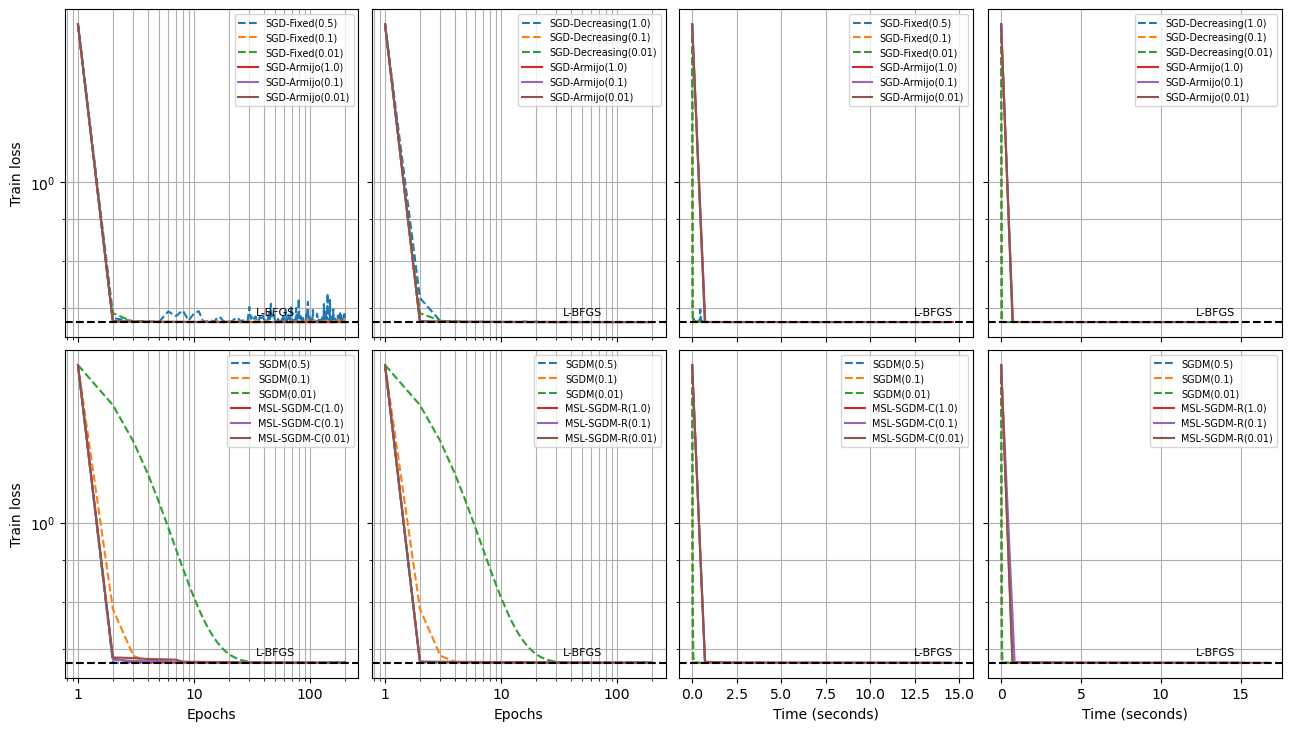

In [13]:
diagnostic(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-diagnostic.pdf")

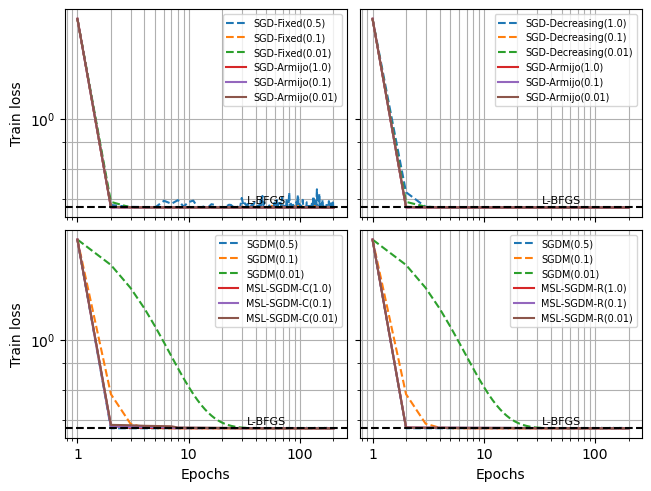

In [52]:
diagnostic_epochs(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-epochs.pdf")

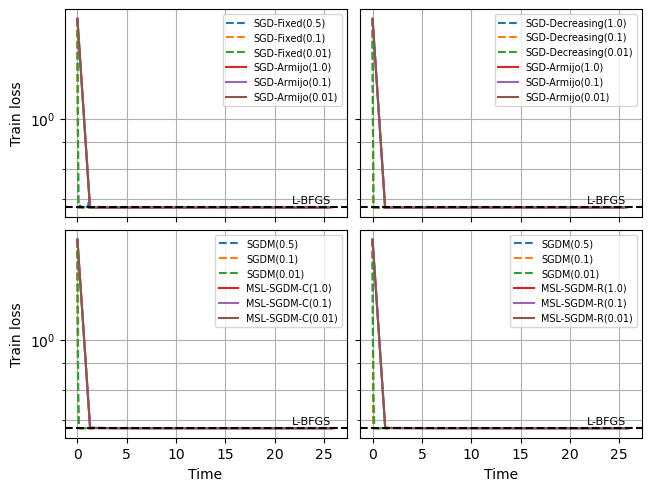

In [53]:
diagnostic_time(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-time.pdf")

## Fine-tuning

In [5]:
sgdfixed_svm1 = LogisticRegression("SGD-Fixed", Csvm).fit(data_svm, ksvm, Msvm, 0.01, stop=1)

In [6]:
sgddecre_svm1 = LogisticRegression("SGD-Decreasing", Csvm).fit(data_svm, ksvm, Msvm, 1, stop=1)

In [7]:
sgdm_svm1 = LogisticRegression("SGDM", Csvm).fit(data_svm, ksvm, Msvm, 0.05, 0.9, stop=1)

In [14]:
sgdarmijo_svm1 = LogisticRegression("SGD-Armijo", Csvm).fit(data_svm, ksvm, Msvm, 0.5, stop=1)

In [12]:
mslc_svm1 = LogisticRegression("MSL-SGDM-C", Csvm).fit(data_svm, ksvm, Msvm, 0.1, 0.9, stop=1)

In [10]:
mslr_svm1 = LogisticRegression("MSL-SGDM-R", Csvm).fit(data_svm, ksvm, Msvm, 1, 0.9, stop=1)

In [15]:
fine_svm_data = optim_data([sgdfixed_svm1, sgddecre_svm1, sgdm_svm1, sgdarmijo_svm1, mslc_svm1, mslr_svm1])

test_svm = models_summary(fine_svm_data, benchSvm_data).sort_values(by="Loss")
test_svm

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
3,SGD-Fixed,1,16.0,0.01,0.0,0.673303,9.500603e-04,0.000000e+00,24,0.654257,0.51725,0.182211
5,SGDM,1,16.0,0.05,0.9,0.673303,1.151125e-03,3.162020e-322,15,0.653933,0.51700,0.181294
4,SGD-Decreasing,1,16.0,1.00,0.0,0.673303,1.275870e-03,3.162020e-322,56,0.653933,0.51700,0.180963
6,SGD-Armijo,1,16.0,0.50,0.0,0.673303,1.305127e-03,3.162020e-322,21,0.653933,0.51550,0.181605
8,MSL-SGDM-R,1,16.0,1.00,0.9,0.673304,1.672957e-03,3.162020e-322,193,0.653933,0.51600,0.181831
7,MSL-SGDM-C,1,16.0,0.10,0.9,0.673363,1.123857e-02,1.471510e+01,200,0.650372,0.50850,0.175015


In [16]:
print(test_svm[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.673302 & 0.516750 \\
CG & NaN & 8 & NaN & 0.673302 & 0.516750 \\
L-BFGS & NaN & 5 & NaN & 0.673302 & 0.516250 \\
SGD-Fixed & 0.010000 & 24 & 0.000000 & 0.673303 & 0.517250 \\
SGDM & 0.050000 & 15 & 0.000000 & 0.673303 & 0.517000 \\
SGD-Decreasing & 1.000000 & 56 & 0.000000 & 0.673303 & 0.517000 \\
SGD-Armijo & 0.500000 & 21 & 0.000000 & 0.673303 & 0.515500 \\
MSL-SGDM-R & 1.000000 & 193 & 0.000000 & 0.673304 & 0.516000 \\
MSL-SGDM-C & 0.100000 & 200 & 14.715103 & 0.673363 & 0.508500 \\
\bottomrule
\end{tabular}



# Australian

In [2]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}


In [3]:
CAustr = 1
MAustr = 8
kAustr = 200

## Benchmark

In [4]:
benchAustr = run_bench(data_austr, CAustr)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", CAustr, data_austr, kAustr, MAustr, (0.3, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_austr = run_solvers("SGDM", CAustr, data_austr, kAustr, MAustr, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", CAustr, data_austr, kAustr, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
modelsAustr_data = optim_data(sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [12]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.335336
7,SGD-Decreasing,1,8.0,0.100,0.0,0.615582,0.000163,0.227044,200,0.855072,0.876812,0.335333
5,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000590,0.219511,200,0.855072,0.876812,0.335391
11,SGDM,1,8.0,0.010,0.9,0.615584,0.002557,0.198267,200,0.851449,0.876812,0.334941
12,SGD-Armijo,1,8.0,1.000,0.0,0.615588,0.003761,2.048224,200,0.851449,0.876812,0.335408
13,SGD-Armijo,1,8.0,0.100,0.0,0.615590,0.004177,2.017630,200,0.855072,0.876812,0.335148
10,SGDM,1,8.0,0.100,0.9,0.615591,0.004997,0.199067,200,0.851449,0.876812,0.333690
6,SGD-Decreasing,1,8.0,1.000,0.0,0.615592,0.006478,0.229746,200,0.862319,0.876812,0.335213


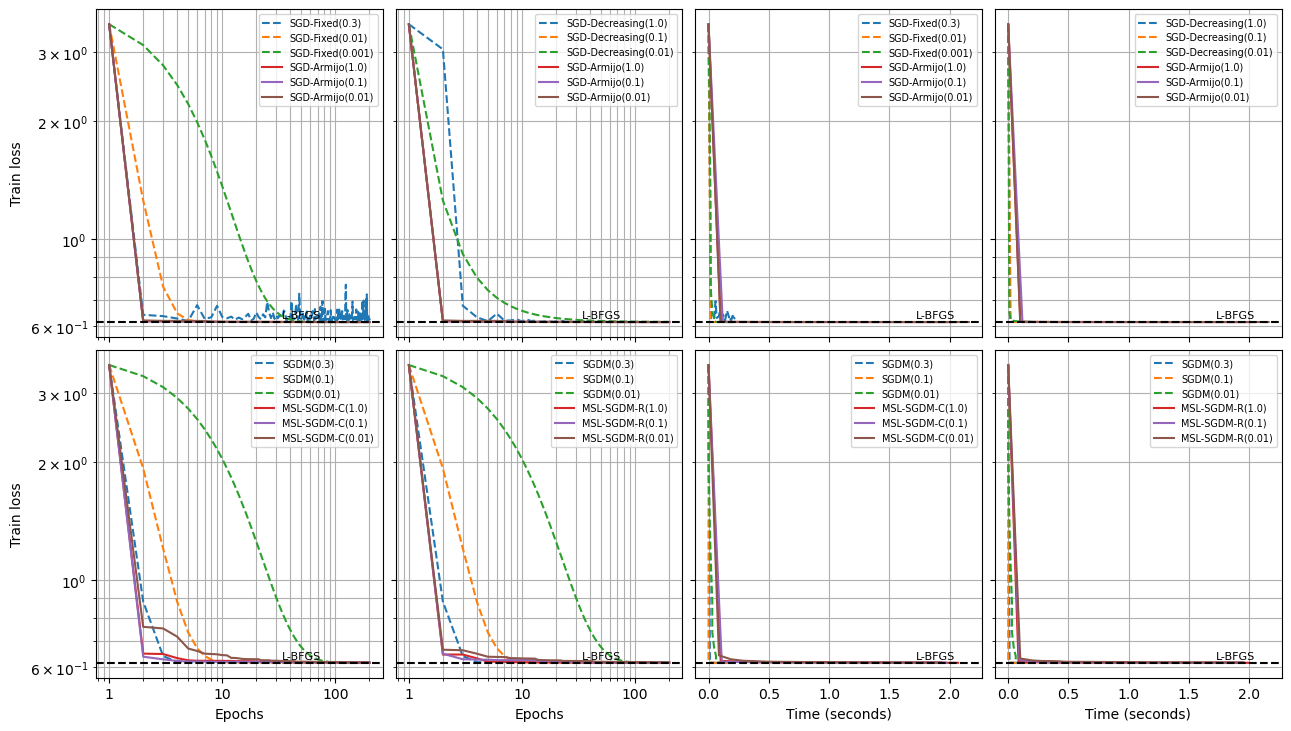

In [13]:
diagnostic(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-diagnostic.pdf")

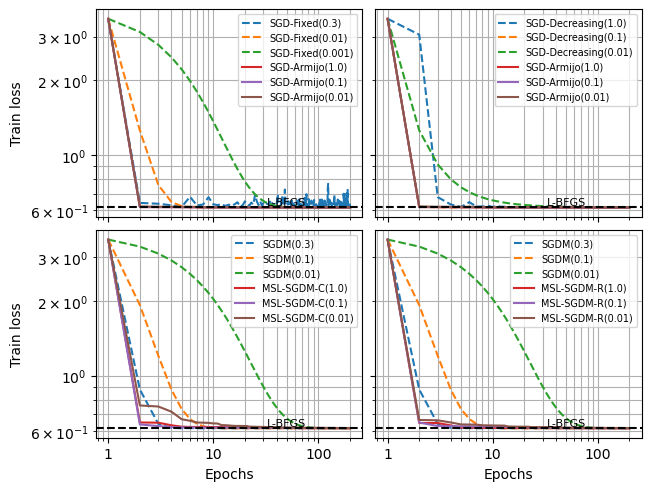

In [77]:
diagnostic_epochs(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-epochs.pdf")

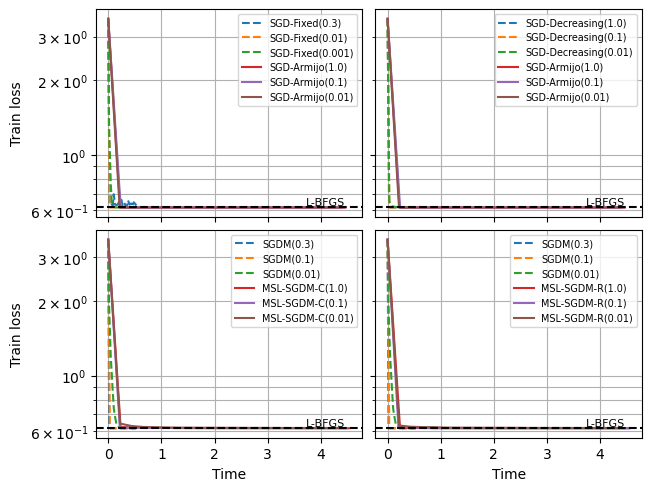

In [78]:
diagnostic_time(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-time.pdf")

## Fine-tuning

In [5]:
sgdfixed_austr1 = LogisticRegression("SGD-Fixed", CAustr).fit(data_austr, kAustr, MAustr, 0.001, stop=1)

In [6]:
sgddecre_austr1 = LogisticRegression("SGD-Decreasing", CAustr).fit(data_austr, kAustr, MAustr, 0.05, stop=1)

In [7]:
sgdm_austr1 = LogisticRegression("SGDM", CAustr).fit(data_austr, kAustr, MAustr, 0.02, 0.9, stop=1)

In [8]:
sgdarmijo_austr1 = LogisticRegression("SGD-Armijo", CAustr).fit(data_austr, kAustr, MAustr, 0.7, stop=1)

In [9]:
mslc_austr1 = LogisticRegression("MSL-SGDM-C", CAustr).fit(data_austr, kAustr, MAustr, 1, 0.9, stop=1)

In [10]:
mslr_austr1 = LogisticRegression("MSL-SGDM-R", CAustr).fit(data_austr, kAustr, MAustr, 1, 0.9, stop=1)

In [11]:
fine_austr_data = optim_data([sgdfixed_austr1, sgddecre_austr1, sgdm_austr1, sgdarmijo_austr1, mslc_austr1, mslr_austr1])

test_austr = models_summary(fine_austr_data, benchAustr_data).sort_values(by=["Loss", "Epochs"])
test_austr

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.335336
4,SGD-Decreasing,1,8.0,0.050,0.0,0.615582,0.000905,0.000000,18,0.855072,0.876812,0.335422
5,SGDM,1,8.0,0.020,0.9,0.615582,0.000939,0.000000,190,0.855072,0.876812,0.335080
3,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000951,0.000000,108,0.855072,0.876812,0.335382
6,SGD-Armijo,1,8.0,0.700,0.0,0.615585,0.002810,4.442389,200,0.855072,0.876812,0.335643
8,MSL-SGDM-R,1,8.0,1.000,0.9,0.615638,0.010787,4.459376,200,0.853261,0.884058,0.334864
7,MSL-SGDM-C,1,8.0,1.000,0.9,0.615716,0.017056,4.499516,200,0.856884,0.876812,0.329708


In [12]:
print(test_austr[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.615582 & 0.876812 \\
L-BFGS & NaN & 7 & NaN & 0.615582 & 0.876812 \\
CG & NaN & 8 & NaN & 0.615582 & 0.876812 \\
SGD-Decreasing & 0.050000 & 18 & 0.000000 & 0.615582 & 0.876812 \\
SGDM & 0.020000 & 190 & 0.000000 & 0.615582 & 0.876812 \\
SGD-Fixed & 0.001000 & 108 & 0.000000 & 0.615582 & 0.876812 \\
SGD-Armijo & 0.700000 & 200 & 4.442389 & 0.615585 & 0.876812 \\
MSL-SGDM-R & 1.000000 & 200 & 4.459376 & 0.615638 & 0.884058 \\
MSL-SGDM-C & 1.000000 & 200 & 4.499516 & 0.615716 & 0.876812 \\
\bottomrule
\end{tabular}



# Mushrooms

In [2]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [3]:
Cmush = 1
Mmush = 32
kmush = 200

## Benchmark

In [4]:
benchMush = run_bench(data_mush, Cmush)

benchMush_data = optim_bench(benchMush)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", Cmush, data_mush, kmush, Mmush, (0.3, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_mush = run_solvers("SGDM", Cmush, data_mush, kmush, Mmush, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", Cmush, data_mush, kmush, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
modelsMush_data = optim_data(sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [12]:
models_summary(modelsMush_data, benchMush_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399399
8,SGD-Decreasing,1,32.0,0.010,0.0,0.580925,0.000038,1.060968,200,0.892291,0.886154,0.399384
7,SGD-Decreasing,1,32.0,0.100,0.0,0.580925,0.000515,0.883737,200,0.892291,0.886154,0.399386
5,SGD-Fixed,1,32.0,0.001,0.0,0.580925,0.000509,0.905101,200,0.892291,0.886154,0.399529
11,SGDM,1,32.0,0.010,0.9,0.580925,0.000754,0.966987,200,0.892291,0.886154,0.399338
6,SGD-Decreasing,1,32.0,1.000,0.0,0.580936,0.006470,0.823104,200,0.892291,0.886769,0.401192
12,SGD-Armijo,1,32.0,1.000,0.0,0.580938,0.005216,27.115251,200,0.892599,0.886154,0.399927
13,SGD-Armijo,1,32.0,0.100,0.0,0.580940,0.005605,28.647394,200,0.892291,0.886769,0.399221


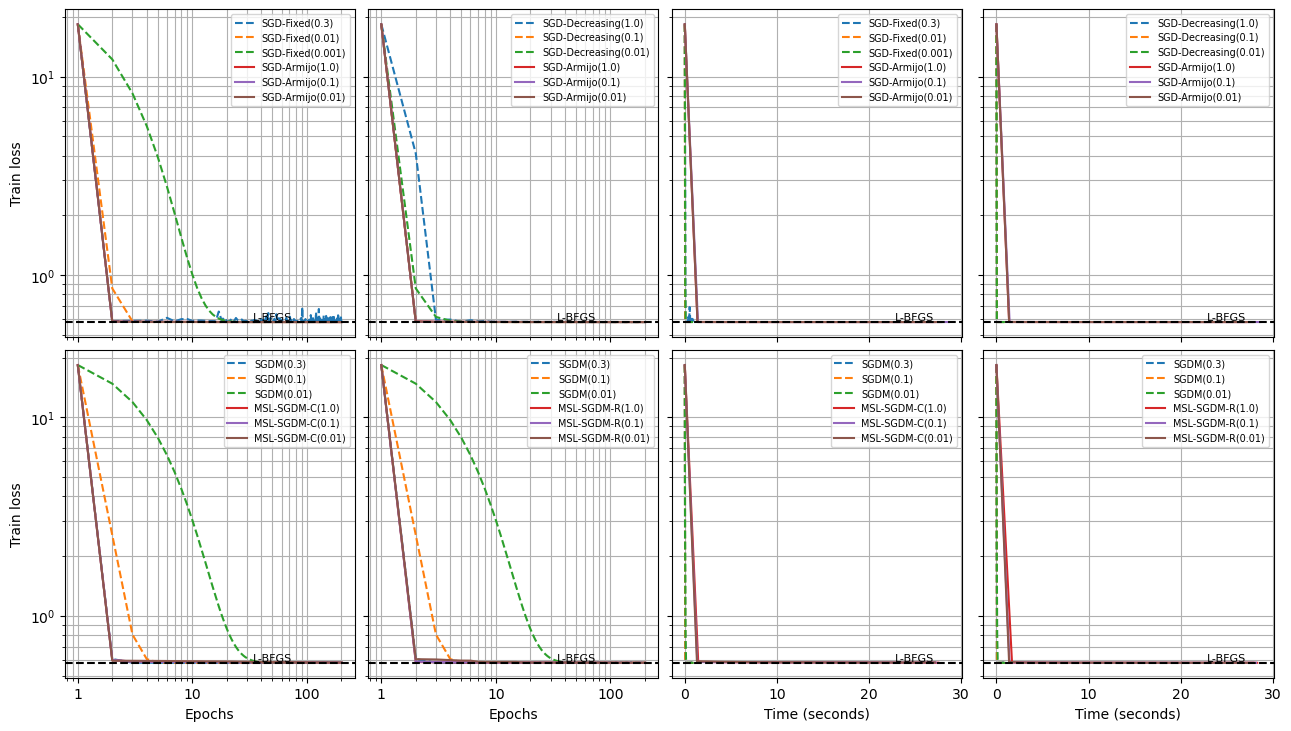

In [13]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

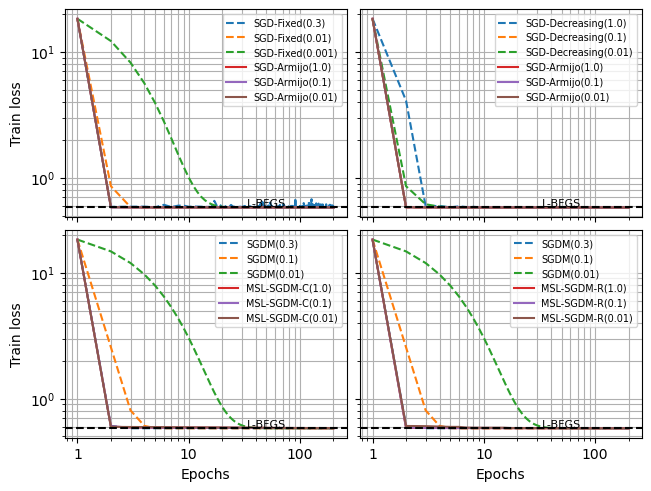

In [96]:
diagnostic_epochs(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-epochs.pdf")

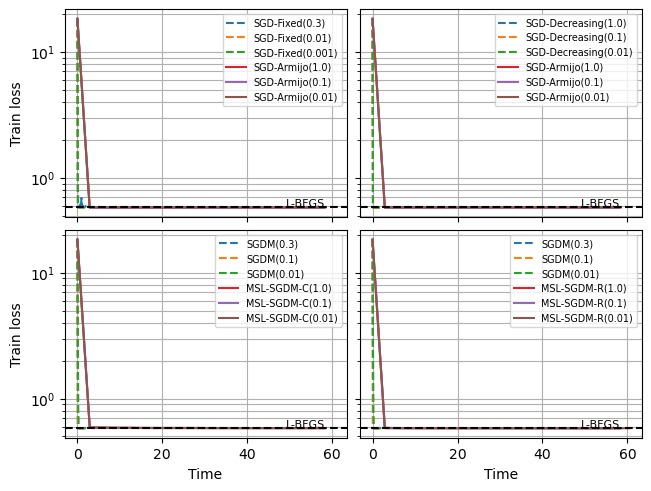

In [97]:
diagnostic_time(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-time.pdf")

## Fine-tuning

In [15]:
sgdfixed_mush1 = LogisticRegression("SGD-Fixed", Cmush).fit(data_mush, kmush, Mmush, 0.001, stop=1)

In [21]:
sgddecre_mush1 = LogisticRegression("SGD-Decreasing", Cmush).fit(data_mush, kmush, Mmush, 0.1, stop=1)

In [27]:
sgdm_mush1 = LogisticRegression("SGDM", Cmush).fit(data_mush, kmush, Mmush, 0.01, 0.9, stop=1)

In [29]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", Cmush).fit(data_mush, kmush, Mmush, 1, stop=1)

In [ ]:
mslc_mush1 = LogisticRegression("MSL-SGDM-C", Cmush).fit(data_mush, kmush, Mmush, 1, 0.9, stop=1)

In [ ]:
mslr_mush1 = LogisticRegression("MSL-SGDM-R", Cmush).fit(data_mush, kmush, Mmush, 1, 0.9, stop=1)

In [30]:
fine_mush_data = optim_data([sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["Loss", "Epochs"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399399
3,SGD-Fixed,1,32.0,0.001,0.0,0.580925,0.000722,0.000000,45,0.892291,0.886154,0.399399
5,SGDM,1,32.0,0.010,0.9,0.580925,0.000790,2.098158,92,0.892291,0.886154,0.399453
4,SGD-Decreasing,1,32.0,0.100,0.0,0.580925,0.000800,0.000000,54,0.892291,0.886154,0.399476
6,SGD-Armijo,1,32.0,1.000,0.0,0.580938,0.005216,58.344068,200,0.892599,0.886154,0.399927
8,MSL-SGDM-R,1,32.0,1.000,0.9,0.581116,0.020123,58.148211,200,0.891368,0.884923,0.397593
7,MSL-SGDM-C,1,32.0,1.000,0.9,0.581724,0.042074,58.191985,200,0.891983,0.887385,0.392413


In [31]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.580925 & 0.886154 \\
L-BFGS & NaN & 9 & NaN & 0.580925 & 0.886154 \\
CG & NaN & 10 & NaN & 0.580925 & 0.886154 \\
SGD-Fixed & 0.001000 & 45 & 0.000000 & 0.580925 & 0.886154 \\
SGDM & 0.010000 & 92 & 2.098158 & 0.580925 & 0.886154 \\
SGD-Decreasing & 0.100000 & 54 & 0.000000 & 0.580925 & 0.886154 \\
SGD-Armijo & 1.000000 & 200 & 58.344068 & 0.580938 & 0.886154 \\
MSL-SGDM-R & 1.000000 & 200 & 58.148211 & 0.581116 & 0.884923 \\
MSL-SGDM-C & 1.000000 & 200 & 58.191985 & 0.581724 & 0.887385 \\
\bottomrule
\end{tabular}



# German

In [2]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [3]:
Cgerman = 1
Mgerman = 32
kgerman = 200

## Benchmark

In [4]:
benchgerman = run_bench(data_german, Cgerman)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", Cgerman, data_german, kgerman, Mgerman, (0.3, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", Cgerman, data_german, kgerman, Mgerman, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_german = run_solvers("SGDM", Cgerman, data_german, kgerman, Mgerman, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", Cgerman, data_german, kgerman, Mgerman, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", Cgerman, data_german, kgerman, Mgerman, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", Cgerman, data_german, kgerman, Mgerman, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
modelsgerman_data = optim_data(sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [12]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by="Loss")

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.700,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.700,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.700,0.248168
7,SGD-Decreasing,1,32.0,0.100,0.0,0.619120,4.915991e-05,0.133259,200,0.70125,0.700,0.248192
6,SGD-Decreasing,1,32.0,1.000,0.0,0.619120,8.608876e-04,0.131835,200,0.70125,0.700,0.247904
4,SGD-Fixed,1,32.0,0.010,0.0,0.619124,4.818886e-03,0.133252,200,0.70125,0.700,0.246666
13,SGD-Armijo,1,32.0,0.100,0.0,0.619128,4.083056e-03,1.518244,200,0.70125,0.700,0.248456
14,SGD-Armijo,1,32.0,0.010,0.0,0.619128,4.131150e-03,1.539226,200,0.70125,0.700,0.248562
12,SGD-Armijo,1,32.0,1.000,0.0,0.619132,5.674954e-03,1.561899,200,0.70125,0.700,0.249675
10,SGDM,1,32.0,0.100,0.9,0.619160,1.211015e-02,0.134387,200,0.70125,0.700,0.247646


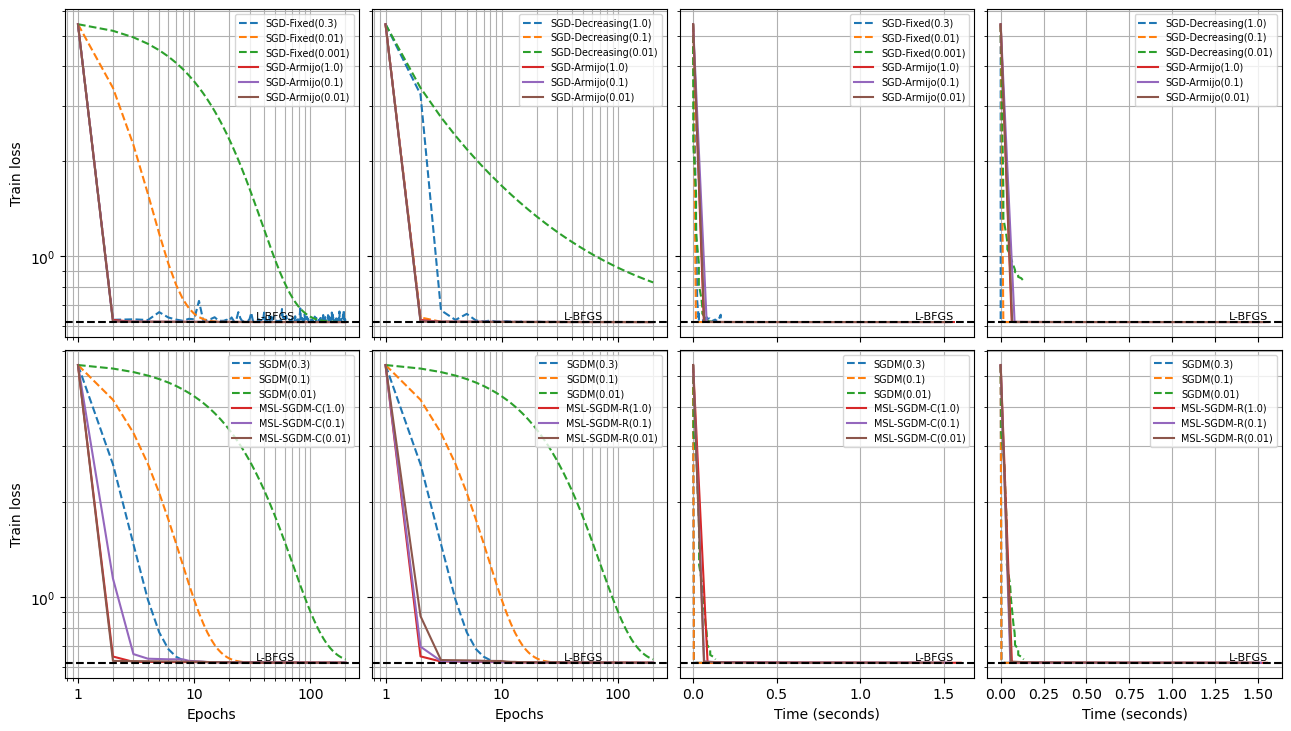

In [13]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

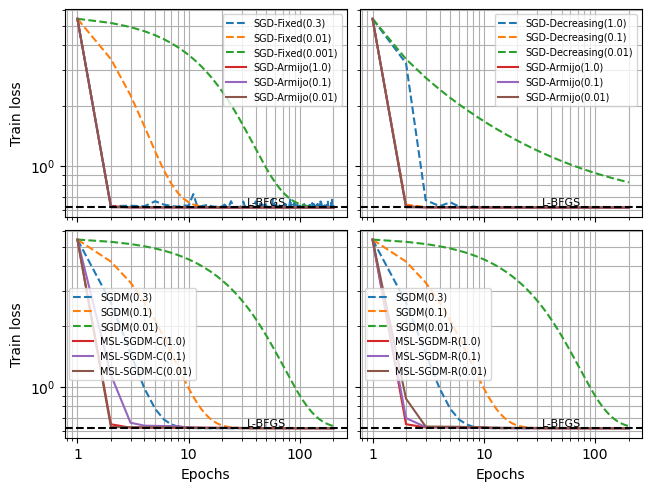

In [116]:
diagnostic_epochs(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-epochs.pdf")

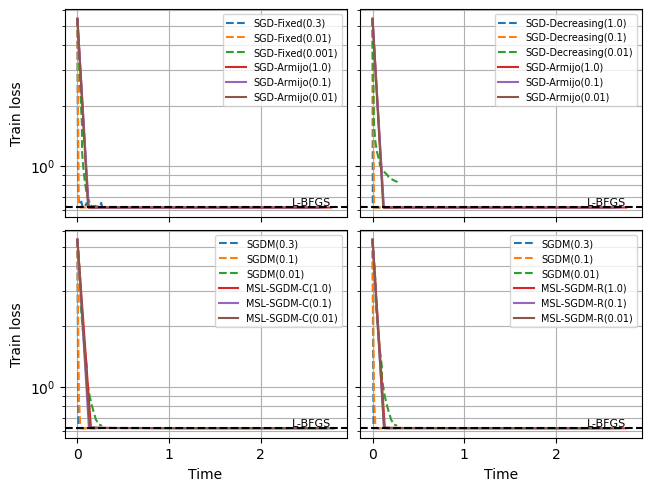

In [117]:
diagnostic_time(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-time.pdf")

## Fine-tuning

In [20]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", Cgerman).fit(data_german, kgerman, Mgerman, 0.005, stop=1)

In [21]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", Cgerman).fit(data_german, kgerman, Mgerman, 1, stop=1)

In [60]:
sgdm_german1 = LogisticRegression("SGDM", Cgerman).fit(data_german, kgerman, Mgerman, 0.025, 0.9, stop=1)

In [71]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", Cgerman).fit(data_german, kgerman, Mgerman, 1, stop=1)

In [76]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", Cgerman).fit(data_german, kgerman, Mgerman, 1, 0.9, stop=1)

In [81]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", Cgerman).fit(data_german, kgerman, Mgerman, 1, 0.9, stop=1)

In [82]:
fine_german_data = optim_data([sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["Loss", "Epochs"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.7,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.7,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.7,0.248168
4,SGD-Decreasing,1,32.0,1.000,0.0,0.619120,8.075209e-04,2.195299e-152,161,0.70125,0.7,0.248094
3,SGD-Fixed,1,32.0,0.005,0.0,0.619121,9.625817e-04,3.458460e-322,63,0.70125,0.7,0.248070
6,SGD-Armijo,1,32.0,1.000,0.0,0.619132,5.674954e-03,1.596410e+00,200,0.70125,0.7,0.249675
5,SGDM,1,32.0,0.025,0.9,0.619138,8.281727e-03,1.653981e-01,200,0.70125,0.7,0.249049
8,MSL-SGDM-R,1,32.0,1.000,0.9,0.619192,1.245045e-02,1.602347e+00,200,0.70125,0.7,0.246535
7,MSL-SGDM-C,1,32.0,1.000,0.9,0.619393,2.489665e-02,1.597145e+00,200,0.70125,0.7,0.238225


In [83]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "Loss", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & Loss & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.619120 & 0.700000 \\
L-BFGS & NaN & 10 & NaN & 0.619120 & 0.700000 \\
CG & NaN & 9 & NaN & 0.619120 & 0.700000 \\
SGD-Decreasing & 1.000000 & 161 & 0.000000 & 0.619120 & 0.700000 \\
SGD-Fixed & 0.005000 & 63 & 0.000000 & 0.619121 & 0.700000 \\
SGD-Armijo & 1.000000 & 200 & 1.596410 & 0.619132 & 0.700000 \\
SGDM & 0.025000 & 200 & 0.165398 & 0.619138 & 0.700000 \\
MSL-SGDM-R & 1.000000 & 200 & 1.602347 & 0.619192 & 0.700000 \\
MSL-SGDM-C & 1.000000 & 200 & 1.597145 & 0.619393 & 0.700000 \\
\bottomrule
\end{tabular}

